# Efectos Mixtos - Ej1 - Guía

- **1 efecto fijo, 1 aleatorio Anidado**

**Ejercicio 1. (Ejercicio 7.3, Kuehl):** Se prepararon tres fórmulas de aleación con cuatro coladas distintos para cada fórmula y se probó el coeficiente de ruptura en dos barras de cada lote. Los datos corresponden a la
fuerza de las barras individualmente y existen cuatro colados anidados dentro de cada aleación.

In [2]:
datos = read.csv("/home/emiliano/EstadisticaAplicada/Estadistica.Aplicada.2018/03_efectos_aleatorios_y_mixtos/datos/ej3_ch7_nuestro.csv", sep=",")
head(datos)
attach(datos)
moldef = as.factor(molde)
aleacionf = as.factor(aleacion)
str(datos)

ruptura,aleacion,molde
13.2,1,1
15.5,1,1
17.1,2,1
16.7,2,1
14.1,3,1
14.8,3,1


The following object is masked from datos (pos = 3):

    molde



'data.frame':	24 obs. of  3 variables:
 $ ruptura : num  13.2 15.5 17.1 16.7 14.1 14.8 15.2 15 16.5 17.3 ...
 $ aleacion: int  1 1 2 2 3 3 1 1 2 2 ...
 $ molde   : int  1 1 1 1 1 1 2 2 2 2 ...


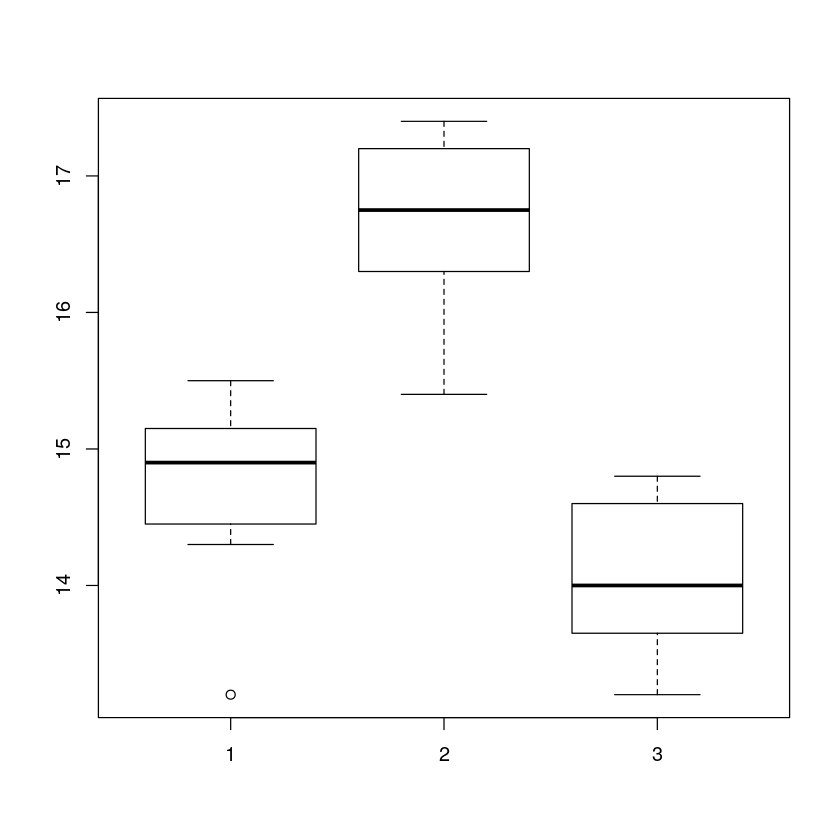

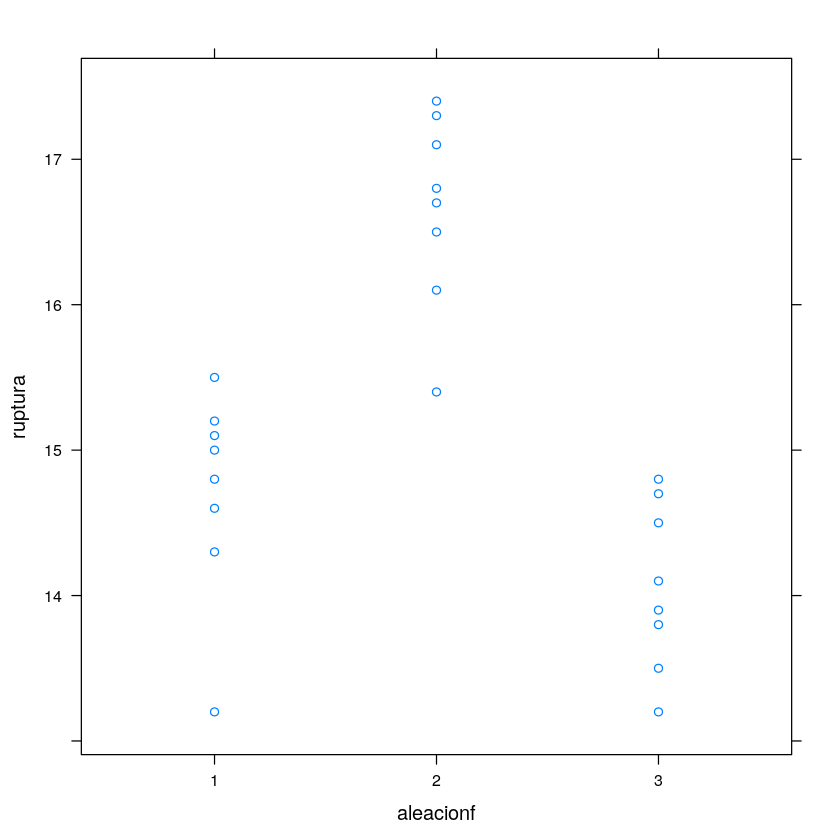

In [3]:
boxplot(ruptura~aleacionf)
library(lattice)
xyplot(ruptura~aleacionf)

## Análisis de los datos

- Factor fijo: fórmula de aleación
- Factor aleatorio: molde anidado, es decir que los moldes no son los mismos para cada fórmula de aleación.

Construimos un modelo que incluya estos factores fijos y aleatorios:

In [4]:
library(lme4)
#library(RLRsim)
modelo = lmer(ruptura ~ aleacionf + (1|moldef%in%aleacionf), REML=TRUE)
confint(modelo)

Loading required package: Matrix
Computing profile confidence intervals ...
Warning message in optwrap(optimizer, devfun, x@theta, lower = x@lower, calc.derivs = TRUE, :
“convergence code 3 from bobyqa: bobyqa -- a trust region step failed to reduce q”Warning message in optwrap(optimizer, par = start, fn = function(x) dd(mkpar(npar1, :
“convergence code 3 from bobyqa: bobyqa -- a trust region step failed to reduce q”Warning message in optwrap(optimizer, par = start, fn = function(x) dd(mkpar(npar1, :
“convergence code 3 from bobyqa: bobyqa -- a trust region step failed to reduce q”Warning message in optwrap(optimizer, par = thopt, fn = mkdevfun(rho, 0L), lower = fitted@lower):
“convergence code 3 from bobyqa: bobyqa -- a trust region step failed to reduce q”

,2.5 %,97.5 %
.sig01,0.0000000,0.46737944
.sigma,0.4719683,0.83526278
(Intercept),14.2714241,15.15357587
aleacionf2,1.3262245,2.57377548
aleacionf3,-1.2737755,-0.02622452


In [6]:
summary(modelo)

Linear mixed model fit by REML ['lmerMod']
Formula: ruptura ~ aleacionf + (1 | moldef %in% aleacionf)

REML criterion at convergence: 48

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.31473 -0.45912  0.09565  0.68868  1.20519 

Random effects:
 Groups                Name        Variance Std.Dev.
 moldef %in% aleacionf (Intercept) 0.000    0.0000  
 Residual                          0.427    0.6534  
Number of obs: 24, groups:  moldef %in% aleacionf, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)  14.7125     0.2310  63.685
aleacionf2    1.9500     0.3267   5.969
aleacionf3   -0.6500     0.3267  -1.990

Correlation of Fixed Effects:
           (Intr) alcnf2
aleacionf2 -0.707       
aleacionf3 -0.707  0.500

**CONCLUIMOS** que los efectos de los factores aleatorios (los moldes) no son significativos. Esto es así ya que el límite inferior del IC de la varianza sig01, es cero.

Por lo tanto, ahora nos enfocamos en analizar el efecto fijo, es decir, las distintas aleaciones. Quisieramos ver, por ejemplo, una comparación de todas contra todas usando Tukey, para ver si son equivalentes. 

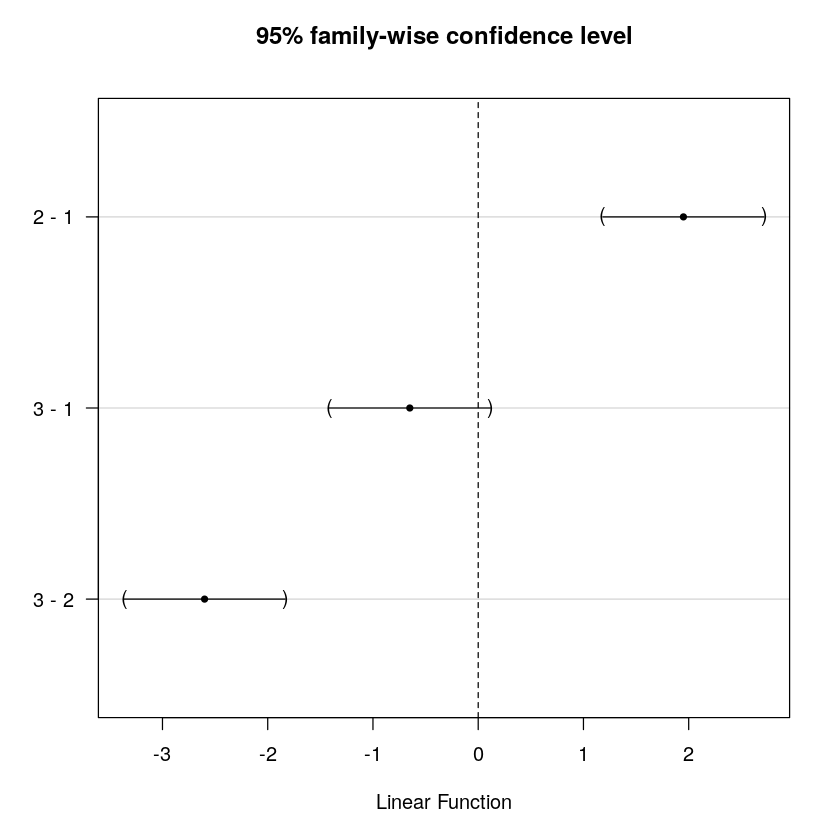

In [9]:
library(multcomp)
mc = glht(modelo, linfct=mcp(aleacionf="Tukey"))
plot(confint(mc))

A partir de analizar los IC vemos que la aleación 3 y 1 son estadísticamente equivalentes, no así la 2-1 y la 3-2.